In [121]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [122]:
## Loading the dataset

data=pd.read_csv('M1_final.csv')

In [123]:
## Exploring the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  int64  
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [124]:
## Statistical insight

data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,30.420819,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,12.314083,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [125]:
## Departure delay DEP_DELAY is negative means the fight has departed or arrived early.
## Since The Taxi-out time is defined as the time spent by a flight between its actual off-block time (AOBT) and actual take-off time (ATOT).
##Replacing all the negative delays by 0. 

In [126]:
data.loc[data['DEP_DELAY']<0,'DEP_DELAY']=0

data.describe()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,9.875330,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,30.420819,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,37.682675,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,12.314083,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,0.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,0.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,0.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


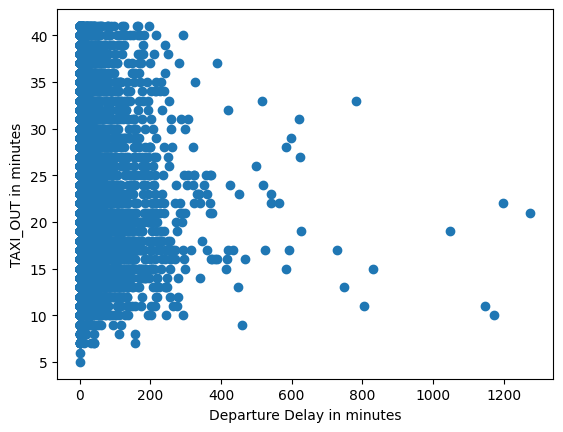

In [127]:
##Explore the relationship between TAXI_OUT and DEP_DELAY
## Scatter plot for avg area income vs price
plt.scatter(data['DEP_DELAY'], data['TAXI_OUT'])
plt.xlabel('Departure Delay in minutes')
plt.ylabel('TAXI_OUT in minutes')
plt.show()

In [128]:
## Correlation matrix
corr_matrix=data.corr()
corr_matrix

C:\Users\cmedj\AppData\Local\Temp\ipykernel_18648\1567324381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.041090,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.135040,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.030251,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,-0.040129,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.009145,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,-0.073816,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.041090,-0.030251,-0.009145,1.000000,-0.037660,-0.037832,0.095905,0.063805,0.037039,-0.029512,0.001455,-0.008785,0.063357,0.040690,-0.065162,-0.074757,-0.013463,0.028483
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.037660,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.007246,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.037832,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.009789,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.095905,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.001578,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.063805,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,0.008907,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.037039,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.000442,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.029512,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.787864,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<AxesSubplot: >

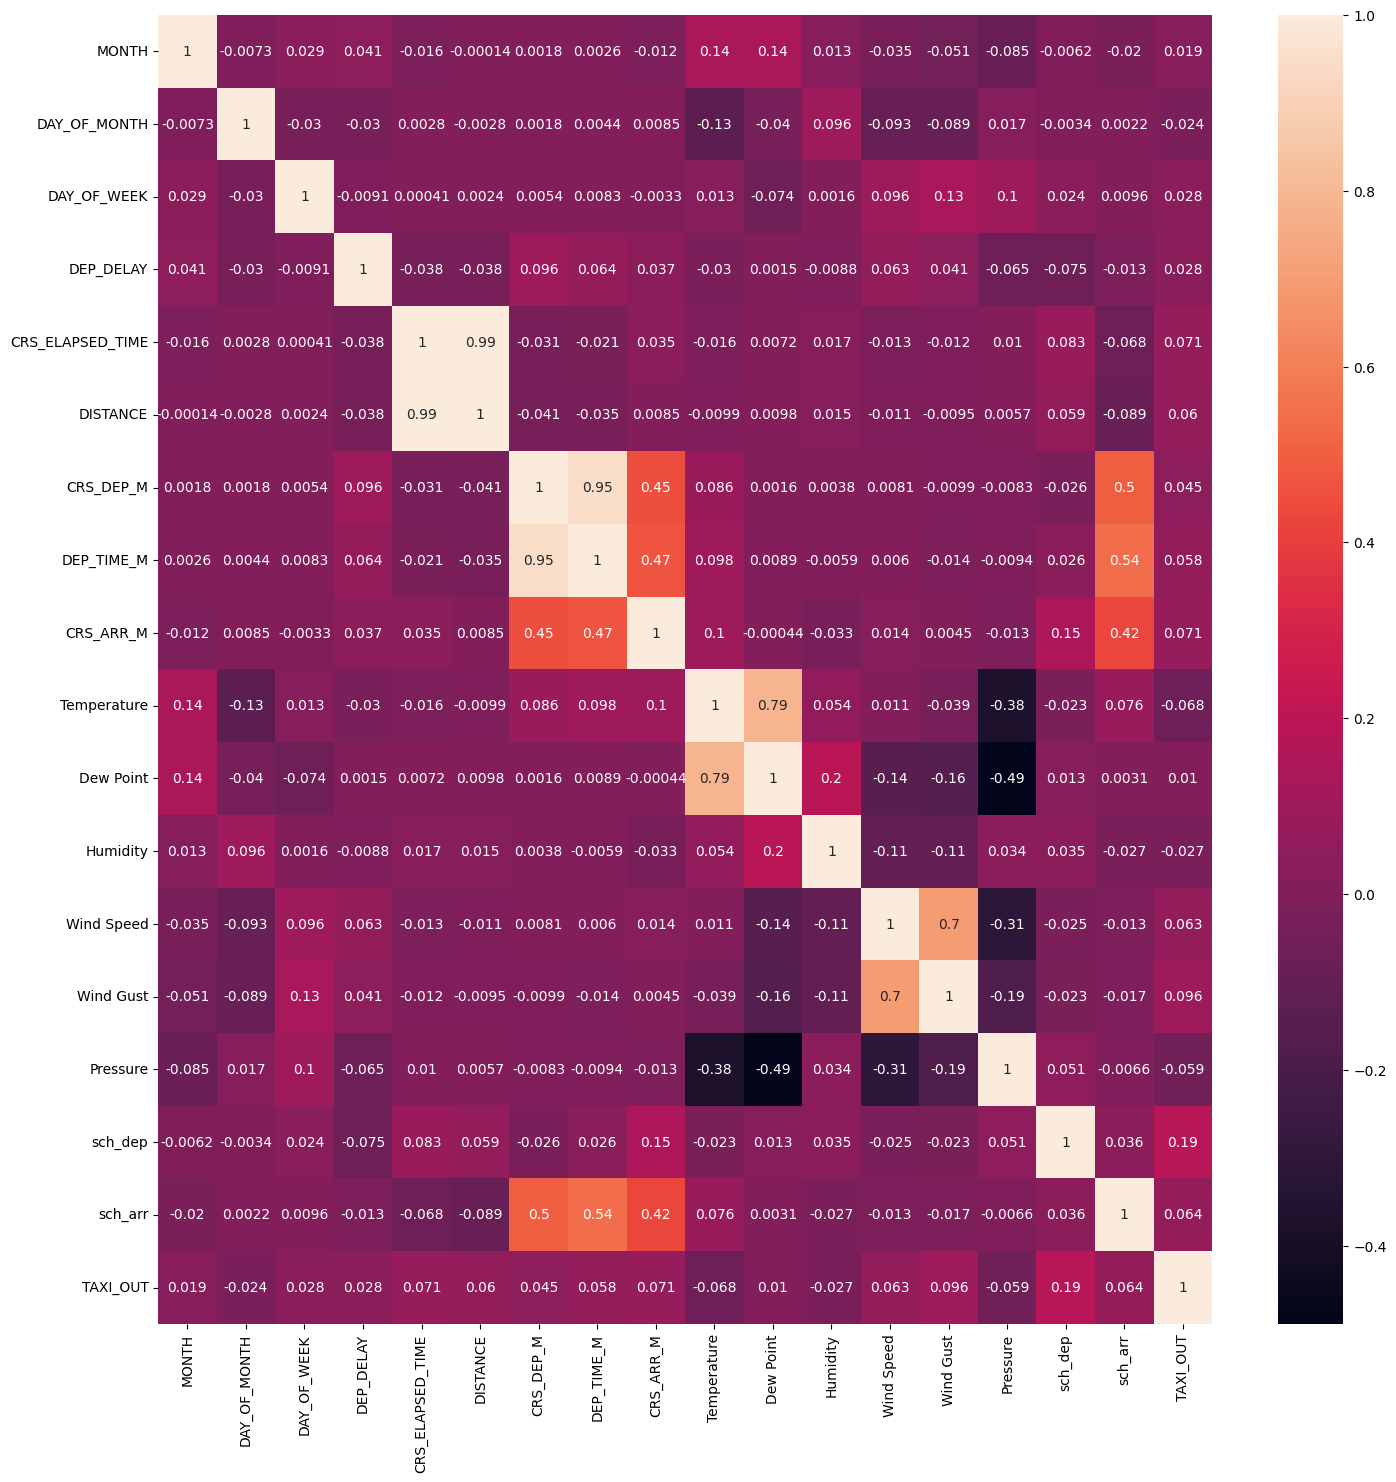

In [129]:
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(corr_matrix,annot=True,fmt='.2g')



In [130]:
## It appears from the correlation matrix above that there is a weak correlation between TAXI_OUT and the rest
## of the variables. Therefore, I will be exploring the linear regression for experimental reasons.

In [131]:
##Replace Condition with numeric data
data['Condition_code']=pd.factorize(data.Condition)[0]

data.Condition.value_counts()

Mostly Cloudy            9124
Fair                     5038
Cloudy                   4992
Partly Cloudy            3209
Light Rain               1865
Mostly Cloudy / Windy    1442
Fair / Windy              918
Partly Cloudy / Windy     582
Rain                      351
Cloudy / Windy            341
Light Rain / Windy        288
Light Drizzle             194
Fog                       147
Wintry Mix                 83
Light Snow                 76
Heavy Rain                 54
Fog / Windy                28
Rain / Windy               25
Light Snow / Windy         24
Light Drizzle / Windy      18
Heavy Rain / Windy          6
Drizzle and Fog             5
Light Freezing Rain         4
Wintry Mix / Windy          4
Snow                        2
Name: Condition, dtype: int64

In [132]:
data.Condition_code.value_counts()

4     9124
1     5038
5     4992
3     3209
6     1865
7     1442
0      918
8      582
12     351
10     341
2      288
11     194
14     147
15      83
17      76
13      54
19      28
21      25
9       24
20      18
24       6
22       5
16       4
18       4
23       2
Name: Condition_code, dtype: int64

In [133]:
data.Wind.value_counts()

W       3273
NW      3173
NNW     2570
WSW     2567
N       2453
SW      2354
WNW     2145
S       1879
SSW     1632
NNE     1280
ENE     1124
E       1068
NE      1044
CALM     835
ESE      466
SE       345
SSE      315
VAR      295
Name: Wind, dtype: int64

In [134]:
##Replace 'Wind' with numeric data (degrees) and create a new column 'wind_deg'


data.loc[data['Wind'] == 'N', 'wind_deg'] = 348.75
data.loc[data['Wind'] == 'NNE', 'wind_deg'] = 11.25
data.loc[data['Wind'] == 'NE', 'wind_deg'] = 33.75
data.loc[data['Wind'] == 'ENE', 'wind_deg'] = 56.25
data.loc[data['Wind'] == 'E', 'wind_deg'] = 78.75
data.loc[data['Wind'] == 'ESE', 'wind_deg'] = 101.25
data.loc[data['Wind'] == 'SE', 'wind_deg'] = 123.75
data.loc[data['Wind'] == 'SSE', 'wind_deg'] = 146.25
data.loc[data['Wind'] == 'S', 'wind_deg'] = 168.75
data.loc[data['Wind'] == 'SSW', 'wind_deg'] = 191.25
data.loc[data['Wind'] == 'SW', 'wind_deg'] = 213.75
data.loc[data['Wind'] == 'WSW', 'wind_deg'] = 236.25
data.loc[data['Wind'] == 'W', 'wind_deg'] = 258.75
data.loc[data['Wind'] == 'WNW', 'wind_deg'] = 281.25
data.loc[data['Wind'] == 'NW', 'wind_deg'] = 303.75
data.loc[data['Wind'] == 'NNW', 'wind_deg'] = 326.25
data.loc[data['Wind'] == 'CALM', 'wind_deg'] = 0.0
data.loc[data['Wind'] == 'VAR', 'wind_deg'] = 120.0





In [135]:
data.wind_deg.value_counts()

258.75    3273
303.75    3173
326.25    2570
236.25    2567
348.75    2453
213.75    2354
281.25    2145
168.75    1879
191.25    1632
11.25     1280
56.25     1124
78.75     1068
33.75     1044
0.00       835
101.25     466
123.75     345
146.25     315
120.00     295
Name: wind_deg, dtype: int64

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  int64  
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [137]:
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,Condition_code,wind_deg
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28818.000000
mean,7.894240,16.021096,4.008952,9.875330,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,30.420819,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570,4.155413,215.665469
std,4.991723,8.750179,1.985230,37.682675,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,12.314083,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915,2.696067,103.666776
min,1.000000,1.000000,1.000000,0.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,1.000000,8.000000,2.000000,0.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000,3.000000,168.750000
50%,11.000000,16.000000,4.000000,0.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000,4.000000,236.250000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000,5.000000,303.750000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000,24.000000,348.750000


In [138]:
data['wind_deg'] = data['wind_deg'].fillna(data['wind_deg'].mean())

In [139]:
##Drop the non numeric columns from df as these were already replaced by numeric data (categories)
df=data
df.drop(['OP_UNIQUE_CARRIER','TAIL_NUM','DEST','Wind','Condition'],axis=1,inplace=True)
df



,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,Condition_code,wind_deg
0,11,1,5,0,124,636,324,323,448,48,34,58,25,38,29.86,9,17,14,0,258.75
1,11,1,5,0,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,15,0,258.75
2,11,1,5,40,181,1069,301,341,482,48,34,58,25,38,29.86,9,17,22,0,258.75
3,11,1,5,0,168,944,345,343,513,48,34,58,25,38,29.86,9,17,12,0,258.75
4,11,1,5,0,139,760,360,356,499,46,32,58,24,35,29.91,9,17,13,0,258.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,57,150,1370,1372,1427,39,38,96,6,0,30.18,20,32,19,5,348.75
28816,1,31,5,2,75,187,1390,1392,25,39,38,96,6,0,30.18,19,23,22,5,348.75
28817,1,31,5,283,392,2422,1125,1408,1337,39,38,96,6,0,30.18,19,23,21,5,348.75
28818,1,31,5,5,224,1598,1417,1422,261,39,38,96,6,0,30.18,19,23,13,5,348.75


In [140]:
df.insert(19,'taxi_out_new',df['TAXI_OUT'],True)
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,...,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,Condition_code,taxi_out_new,wind_deg
0,11,1,5,0,124,636,324,323,448,48,...,58,25,38,29.86,9,17,14,0,14,258.75
1,11,1,5,0,371,2475,340,333,531,48,...,58,25,38,29.86,9,17,15,0,15,258.75
2,11,1,5,40,181,1069,301,341,482,48,...,58,25,38,29.86,9,17,22,0,22,258.75
3,11,1,5,0,168,944,345,343,513,48,...,58,25,38,29.86,9,17,12,0,12,258.75
4,11,1,5,0,139,760,360,356,499,46,...,58,24,35,29.91,9,17,13,0,13,258.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,57,150,1370,1372,1427,39,...,96,6,0,30.18,20,32,19,5,19,348.75
28816,1,31,5,2,75,187,1390,1392,25,39,...,96,6,0,30.18,19,23,22,5,22,348.75
28817,1,31,5,283,392,2422,1125,1408,1337,39,...,96,6,0,30.18,19,23,21,5,21,348.75
28818,1,31,5,5,224,1598,1417,1422,261,39,...,96,6,0,30.18,19,23,13,5,13,348.75


In [141]:
df.drop(['TAXI_OUT'],axis=1,inplace=True)
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,Condition_code,taxi_out_new,wind_deg
0,11,1,5,0,124,636,324,323,448,48,34,58,25,38,29.86,9,17,0,14,258.75
1,11,1,5,0,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,0,15,258.75
2,11,1,5,40,181,1069,301,341,482,48,34,58,25,38,29.86,9,17,0,22,258.75
3,11,1,5,0,168,944,345,343,513,48,34,58,25,38,29.86,9,17,0,12,258.75
4,11,1,5,0,139,760,360,356,499,46,32,58,24,35,29.91,9,17,0,13,258.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,57,150,1370,1372,1427,39,38,96,6,0,30.18,20,32,5,19,348.75
28816,1,31,5,2,75,187,1390,1392,25,39,38,96,6,0,30.18,19,23,5,22,348.75
28817,1,31,5,283,392,2422,1125,1408,1337,39,38,96,6,0,30.18,19,23,5,21,348.75
28818,1,31,5,5,224,1598,1417,1422,261,39,38,96,6,0,30.18,19,23,5,13,348.75


In [142]:
##Specifying the X and Y variables
X=data.iloc[:, 0:18]
Y=data.iloc[:,18]

In [143]:
## train, test and split my data

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3, random_state=32)


In [144]:
x_train

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,Condition_code
9767,11,30,6,54,78,264,1380,1434,18,33,18,54,7,0,30.02,20,18,3
19142,1,1,3,0,81,184,1009,1002,1090,38,22,53,18,26,29.82,26,31,4
6381,11,20,3,0,384,2422,675,672,879,44,34,68,20,0,29.93,29,19,5
3104,11,10,7,18,175,944,1020,1038,1195,49,35,59,10,0,30.02,33,28,4
24591,1,19,7,0,346,2153,485,485,711,43,31,62,13,23,29.70,45,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20414,1,5,7,76,184,740,995,1071,1119,37,20,50,15,23,29.99,30,34,3
27516,1,28,2,0,141,541,480,470,621,39,27,62,21,25,29.80,37,37,7
9526,11,30,6,0,114,427,630,618,744,39,14,36,15,0,30.08,19,22,3
9771,12,1,7,0,124,636,321,311,445,30,16,56,6,0,30.01,11,24,5


In [145]:
## Standard Scaler Avoid overfitting
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [146]:
x_train

array([[ 0.61794706,  1.60088848,  1.00123933, ..., -1.16622547,
        -1.26676775, -0.42935368],
       [-1.38850114, -1.71422822, -0.50787574, ..., -0.53780783,
         0.30727363, -0.05892298],
       [ 0.61794706,  0.45774479, -0.50787574, ..., -0.22359901,
        -1.14568764,  0.31150773],
       ...,
       [ 0.61794706,  1.60088848,  1.00123933, ..., -1.27096174,
        -0.78244732, -0.42935368],
       [ 0.81859188, -1.71422822,  1.50427769, ..., -2.10885192,
        -0.54028711,  0.31150773],
       [ 0.81859188, -1.25697075, -0.00483739, ..., -0.43307156,
         0.54943384, -0.05892298]])

In [147]:
## Linear Regression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [148]:
## Declare the prediction
pred_lin=lin_reg.predict(x_test)

In [149]:
## Create a data frame for predictions
pd.DataFrame({'Actual':y_test,'Predicted':pred_lin})

,Actual,Predicted
9362,23,22.461366
23840,14,22.583937
24617,22,22.581306
24899,19,24.112892
2007,20,18.749997
...,...,...
25794,24,20.791508
9596,21,18.649936
23574,26,18.034080
3772,19,24.291739


In [150]:
##Model evaluation
## MAE Mean absolute error
##MSE Mean Square Error
##RMSE Root main square error
##R^2 or R2 square 0 to 1


In [151]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test,pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))


MAE: 5.244489109134934
MSE: 43.48008833196273
RMSE: 6.593943306699166
R2: 0.08567031521837332


In [158]:
##random forest regression
rf_reg=RandomForestRegressor(n_estimators=100,random_state=32)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=32)

In [ ]:
rf_reg_pred=rf_reg.predict(x_test)
pd.DataFrame({'Actual': y_test,'Predicted': rf_reg_pred})

,Actual,Predicted
9362,23,23.80
23840,14,18.31
24617,22,22.62
24899,19,18.59
2007,20,19.83
...,...,...
25794,24,22.45
9596,21,18.64
23574,26,22.23
3772,19,20.57


In [ ]:
##Measuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test,rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rf_reg_pred)))
print('R2:', metrics.r2_score(y_test, rf_reg_pred))

MAE: 4.414152209114042
MSE: 32.72286210964608
RMSE: 5.720390031251897
R2: 0.3118807862248255


In [ ]:
## Polynomial regression

poly_reg=PolynomialFeatures(degree=2)

x_train_2=poly_reg.fit_transform(x_train)
x_test_2=poly_reg.transform(x_test)
mul_reg=LinearRegression()
mul_reg.fit(x_train_2,y_train)

LinearRegression()

In [ ]:
##prediction

mul_pred=mul_reg.predict(x_test_2)
pd.DataFrame({'Actual': y_test,'Predicted': mul_pred})

,Actual,Predicted
9362,23,21.280684
23840,14,24.404630
24617,22,21.536371
24899,19,23.007536
2007,20,19.227140
...,...,...
25794,24,20.735810
9596,21,21.366055
23574,26,17.803873
3772,19,23.013746


In [ ]:
##Measuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test,mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,mul_pred)))
print('R2:', metrics.r2_score(y_test, mul_pred))

MAE: 5.091235993540736
MSE: 41.53457744857373
RMSE: 6.444732535068754
R2: 0.1265818777517146


In [ ]:
##Conclusion

##Decrease the number of variables
##Select predictor variables related to wind, temperature and humidity.
##Drop categoric data

In [153]:
df.drop(['MONTH','DAY_OF_MONTH','DAY_OF_WEEK'],axis=1,inplace=True)
df

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,Condition_code,taxi_out_new,wind_deg
0,0,124,636,324,323,448,48,34,58,25,38,29.86,9,17,0,14,258.75
1,0,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,0,15,258.75
2,40,181,1069,301,341,482,48,34,58,25,38,29.86,9,17,0,22,258.75
3,0,168,944,345,343,513,48,34,58,25,38,29.86,9,17,0,12,258.75
4,0,139,760,360,356,499,46,32,58,24,35,29.91,9,17,0,13,258.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2,57,150,1370,1372,1427,39,38,96,6,0,30.18,20,32,5,19,348.75
28816,2,75,187,1390,1392,25,39,38,96,6,0,30.18,19,23,5,22,348.75
28817,283,392,2422,1125,1408,1337,39,38,96,6,0,30.18,19,23,5,21,348.75
28818,5,224,1598,1417,1422,261,39,38,96,6,0,30.18,19,23,5,13,348.75


In [155]:
df=df.assign(TAXI_OUT=df['taxi_out_new'])

df

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,Condition_code,taxi_out_new,wind_deg,TAXI_OUT
0,0,124,636,324,323,448,48,34,58,25,38,29.86,9,17,0,14,258.75,14
1,0,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,0,15,258.75,15
2,40,181,1069,301,341,482,48,34,58,25,38,29.86,9,17,0,22,258.75,22
3,0,168,944,345,343,513,48,34,58,25,38,29.86,9,17,0,12,258.75,12
4,0,139,760,360,356,499,46,32,58,24,35,29.91,9,17,0,13,258.75,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2,57,150,1370,1372,1427,39,38,96,6,0,30.18,20,32,5,19,348.75,19
28816,2,75,187,1390,1392,25,39,38,96,6,0,30.18,19,23,5,22,348.75,22
28817,283,392,2422,1125,1408,1337,39,38,96,6,0,30.18,19,23,5,21,348.75,21
28818,5,224,1598,1417,1422,261,39,38,96,6,0,30.18,19,23,5,13,348.75,13


In [156]:
df.drop(['taxi_out_new'],axis=1,inplace=True)
df.drop(['Condition_code'],axis=1,inplace=True)
df

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,wind_deg,TAXI_OUT
0,0,124,636,324,323,448,48,34,58,25,38,29.86,9,17,258.75,14
1,0,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,258.75,15
2,40,181,1069,301,341,482,48,34,58,25,38,29.86,9,17,258.75,22
3,0,168,944,345,343,513,48,34,58,25,38,29.86,9,17,258.75,12
4,0,139,760,360,356,499,46,32,58,24,35,29.91,9,17,258.75,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2,57,150,1370,1372,1427,39,38,96,6,0,30.18,20,32,348.75,19
28816,2,75,187,1390,1392,25,39,38,96,6,0,30.18,19,23,348.75,22
28817,283,392,2422,1125,1408,1337,39,38,96,6,0,30.18,19,23,348.75,21
28818,5,224,1598,1417,1422,261,39,38,96,6,0,30.18,19,23,348.75,13


In [162]:
##Specifying the X and Y variables
X=data.iloc[:, 0:15]
Y=data.iloc[:,15]

In [163]:
## Standard Scaler Avoid overfitting
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [164]:
##random forest regression
rf_reg=RandomForestRegressor(n_estimators=100,random_state=32)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=32)

In [165]:
rf_reg_pred=rf_reg.predict(x_test)
pd.DataFrame({'Actual': y_test,'Predicted': rf_reg_pred})

,Actual,Predicted
9362,23,23.80
23840,14,18.31
24617,22,22.62
24899,19,18.59
2007,20,19.83
...,...,...
25794,24,22.45
9596,21,18.64
23574,26,22.23
3772,19,20.57


In [166]:
##Measuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test,rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rf_reg_pred)))
print('R2:', metrics.r2_score(y_test, rf_reg_pred))

MAE: 4.414152209114042
MSE: 32.72286210964608
RMSE: 5.720390031251897
R2: 0.3118807862248255
